In [43]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import joblib as jb
import helper_functions as hlf
from keras.models import Sequential, load_model, Model
from keras.utils import to_categorical

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
drg_path = r'D:\Linnaeus_models\dragon\\'
dmsl_path = r'D:\Linnaeus_models\damsel\\'

drgn_train = len(np.load(f'{drg_path}train\\dragon_train.npy'))
drgn_test = len(np.load(f'{drg_path}test\\dragon_test.npy'))
dmsl_train = len(np.load(f'{dmsl_path}train\\damsel_train.npy'))
dmsl_test = len(np.load(f'{dmsl_path}test\\damsel_test.npy'))

# display how many images after image preprocessing  
x = ['Damselfly', 'Dragonfly']
y = [dmsl_train+dmsl_test, drgn_train+drgn_test]

hlf.plot_bar_graph(x, y, 'Image per Species','Number of Images', 'Species')

In [5]:
# load supervised model
weights_path = './model_weights/'
weights_name = 'sixth2000'
supervised_model = hlf.create_model(weights_path, weights_name)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# load images to check what the intermidiate activation layers detect
dragon_test_path = r'D:\Linnaeus_models\dragon\test\dragon_test.npy'
images = np.load(dragon_test_path)[:1]

## Visualizing intermediate layer activation

C:\Users\GILOR\Desktop\data_science\Flatiron_projects\The_Linnaeus_Bot\helper_functions.py:478: RuntimeWarning:

invalid value encountered in true_divide



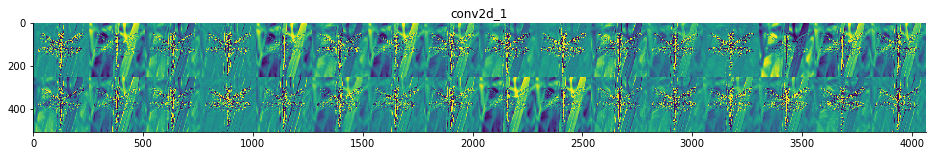

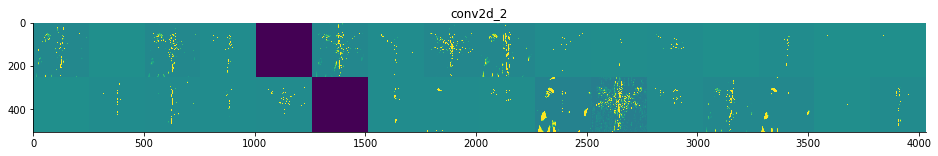

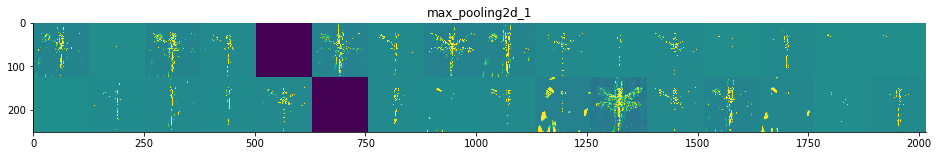

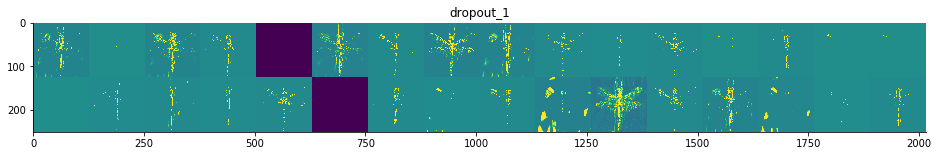

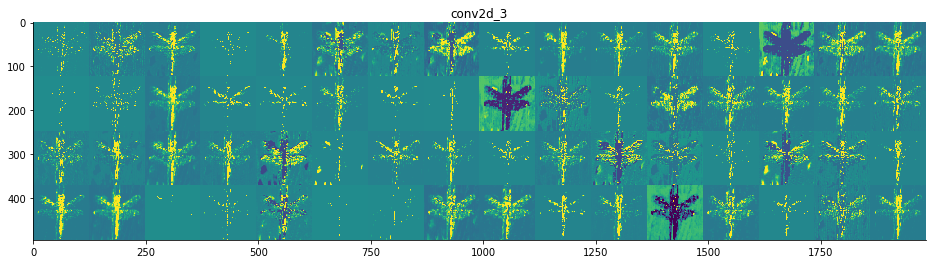

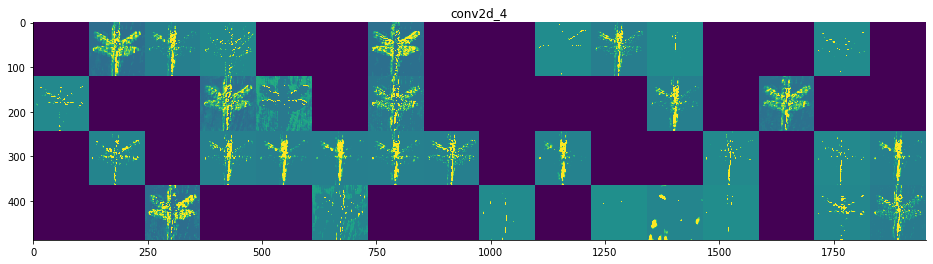

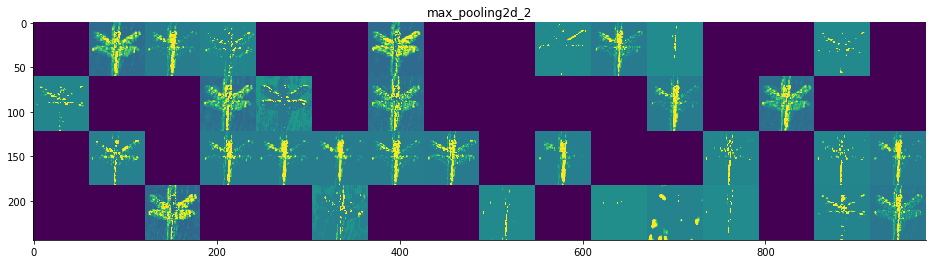

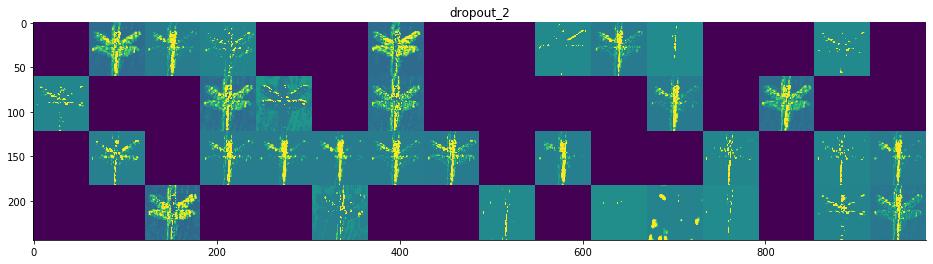

In [7]:
# visualize intermediate layers activation
hlf.plot_intermediate_activation(supervised_model, images, bottom=0, top=8, save=0)

## Visualize changes in accuracy and loss during training

In [8]:
# load model train history over the different training sets
train_path = './train_history/*'
acc, loss = hlf.load_model_stats(train_path)

In [9]:
# plot change in accuracy over the differet epochs
hlf.plot_train_history(acc, 'Accuracy', 'Accuracy', 'Epochs', save='accuracy')

In [10]:
# plot change in loss over the differet epochs
hlf.plot_train_history(loss, 'Loss', 'Loss', 'Epochs', save='loss')

# Visualize classification metrics

In [2]:
# load model 
weights_path = './model_weights/'
weights_name = 'sixth2000'
supervised_model = hlf.create_model(weights_path, weights_name)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
# load testing set
start, end = 0, -1
# load the images to train the clasifier
damsel_test_path = r'D:\Linnaeus_models\damsel\test\damsel_test.npy'
dragon_test_path = r'D:\Linnaeus_models\dragon\test\dragon_test.npy'

test_set, labels = hlf.load_data(damsel_test_path, dragon_test_path, start, end)

In [4]:
# get predictions
x_test = np.expand_dims(test_set, axis=-1)
class_prediction = supervised_model.predict_classes(x_test)

In [15]:
_, _ = hlf.print_metrics(labels, class_prediction, print_score=True)

Recall: 84.5
Accuracy: 85.77


In [16]:
# Identify where the model is wrong
misclassified = hlf.find_wrong_classification(test_set, labels, class_prediction)
# jb.dump(misclassified, r'D:\Linnaeus_models\misclassified.pkl')

C:\Users\GILOR\Desktop\data_science\Flatiron_projects\The_Linnaeus_Bot\helper_functions.py:478: RuntimeWarning:

invalid value encountered in true_divide



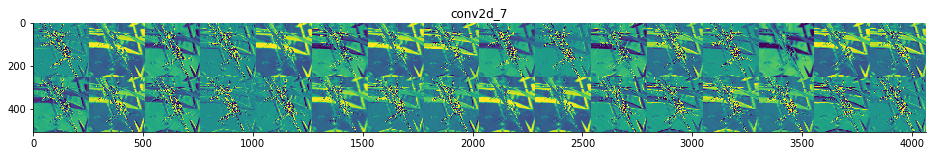

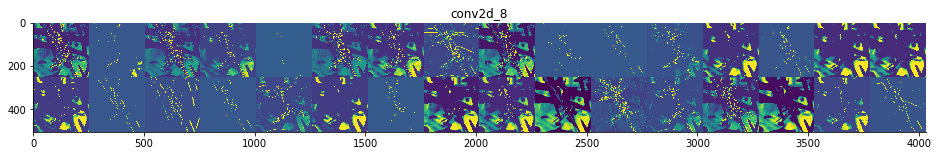

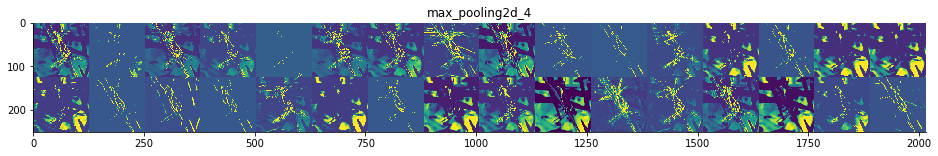

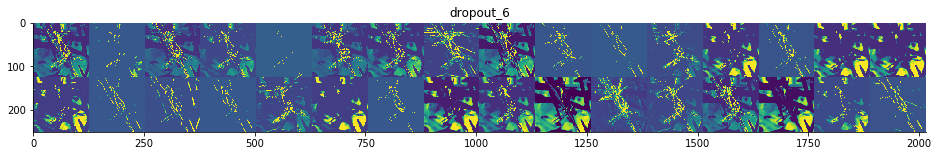

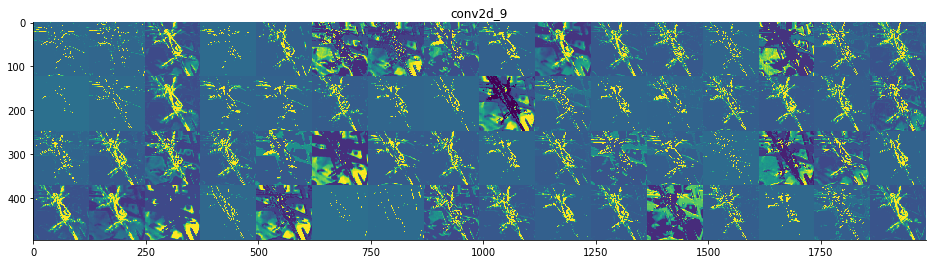

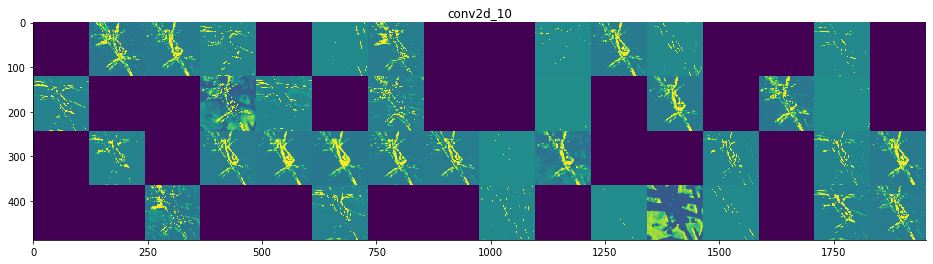

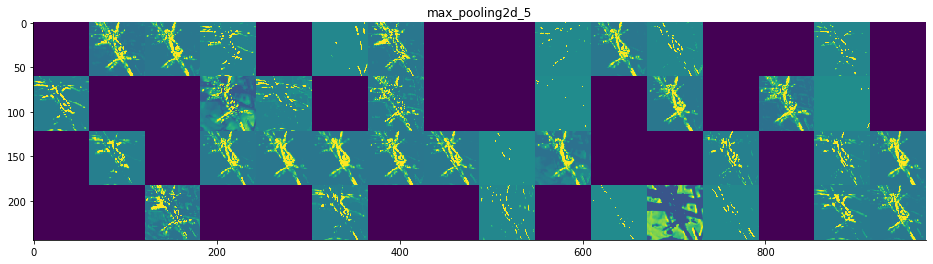

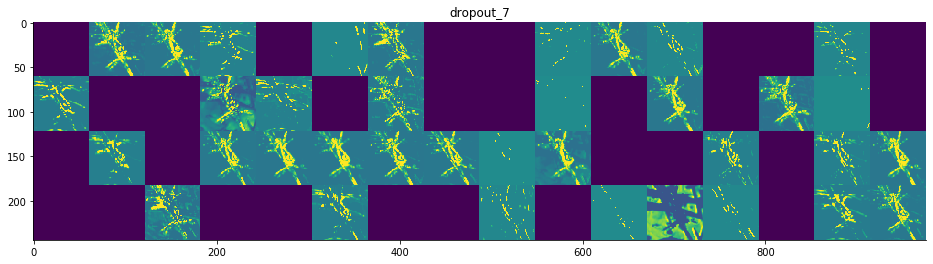

In [18]:
# visualize intermediate layers activation
hlf.plot_intermediate_activation(supervised_model, misclassified[:1], bottom=0, top=8, save=0)

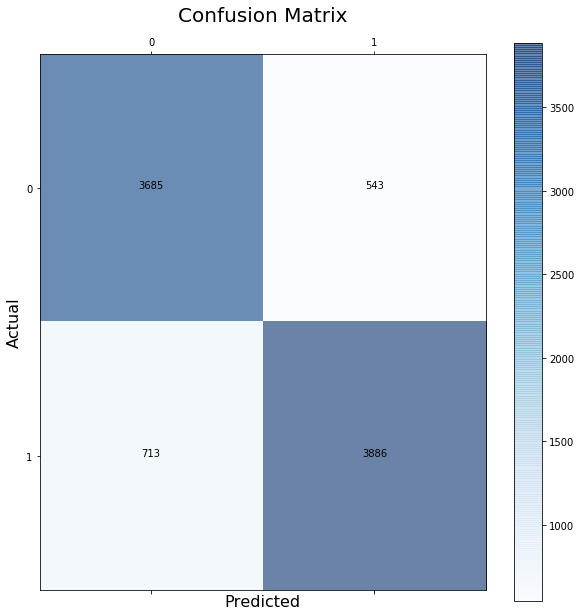

In [44]:
# Plot confusion matrix
class_names = ['Damsel', 'Dragon']
hlf.plot_confusion_matrix(labels, class_prediction, class_names)

# Visualize Unsupervised CNN

In [43]:
# load the "denoised" and original images
unsuper_images = jb.load('./test_images/unsupervised_val_images.pkl')
x_val = jb.load('./test_images/val_images.pkl')

# denoised only 
y_val = np.ones(len(unsuper_images))

In [44]:
# load model 
weights_path = './model_weights/'
weights_name = 'sixth2000'
supervised_model = hlf.create_model(weights_path, weights_name)

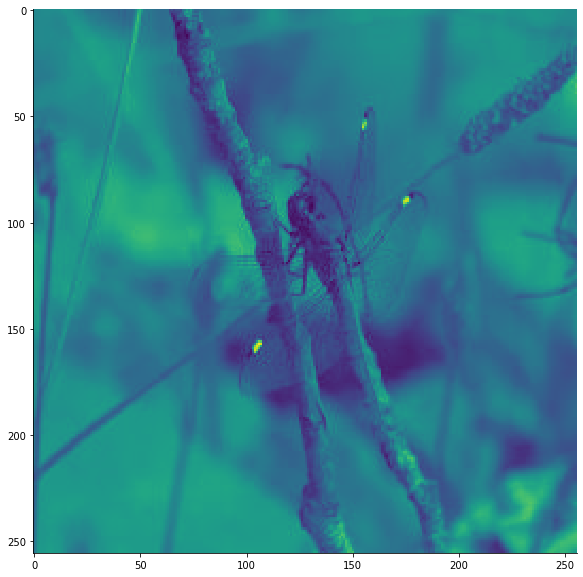

In [45]:
# Display original
plt.imshow(x_val[0].reshape(256, 256))
# plt.savefig('./Images/unsupervised_dragon_actual.jpg')
plt.show()

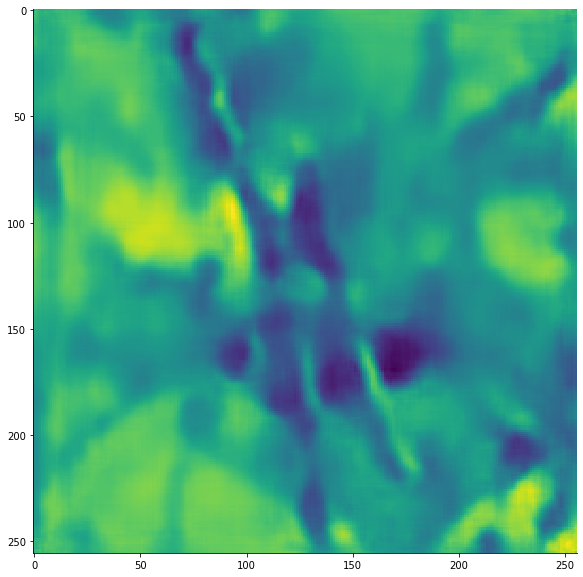

In [46]:
# Display denoised
plt.imshow(unsuper_images[0].reshape(256, 256))
# plt.savefig('./Images/unsupervised_dragon_created.jpg')
plt.show()

In [23]:
# Print Metrics
unsuper_preds = supervised_model.predict_classes(unsuper_images)
_, _ = hlf.print_metrics(y_val, unsuper_preds, print_score=True)

Recall: 34.28
Accuracy: 34.28


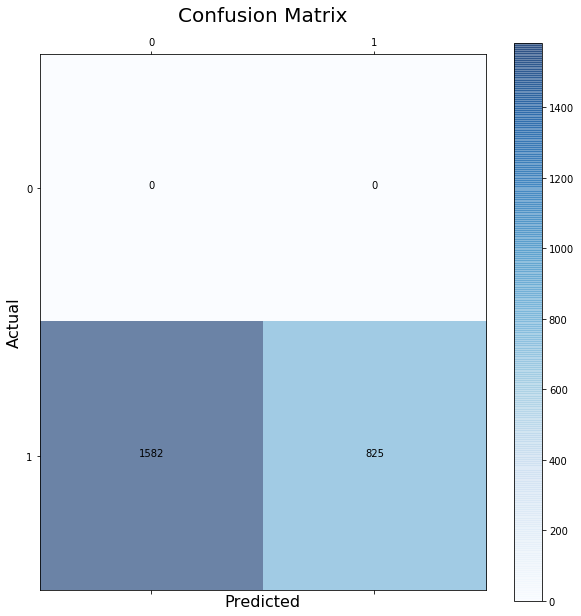

In [53]:
# Plot confusion matrix
class_names = ['Damsel', 'Dragon']
hlf.plot_confusion_matrix(y_val, unsuper_preds, class_names, save='unsupervised')

In [ ]:
filename = './unsupervised_predictions_1.pkl'
compiled_results = hlf.save_predict_class(supervised_model, unsuper_images, y_val, filename)

In [ ]:
results = jb.load('./unsupervised_predictions_1.pkl')
results.keys()

In [ ]:
_, _ = hlf.print_metrics(compiled_results['actual'], compiled_results['pred_class'], print_score=True)

In [ ]:
hlf.plot_confusion_matrix(compiled_results['actual'], compiled_results['pred_class'], ['Damsel', 'Dragon'], save=None)